In [ ]:
import pandas as pd
from google.colab import drive
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
import sklearn.metrics
from sklearn.metrics import precision_recall_curve
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
import matplotlib.pyplot as plt


In [ ]:
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [ ]:
#Load Data set
NCAA = pd.read_csv('/content/gdrive/MyDrive/Capstone_Original_Dataset.csv')

In [ ]:
#Removing games where the Home or Away team has 0 values for Home or Away stats
NCAA = NCAA.loc[(NCAA[['Home_Points_Home', 'Home_Points_Away','Away_Points_Home', 'Away_Points_Away']] != 0).all(axis=1)]

In [ ]:
NCAA

,Home_Team,Away_Team,Home_TurnAst_Last3,Home_TurnAst_Home,Home_TurnAst_Away,Home_Pts_Last3,Home_Points_Home,Home_Points_Away,Home_Avg_Scoring_Margin_Last3,Home_Avg_Scoring_Margin_Home,...,Away_Opp_Eff_Poss_Last3,Away_Opp_Eff_Poss_Home,Away_Opp_Eff_Poss_Away,Away_Team_Luck,Away_Team_SOS,Away_Team_Consis,Away_Team_First_Half_Rating,Away_Team_Second_Half_Rating,Away_Team_Last5,Home_Win/Lose_Pt
0,San Jose St.,South Dakota,0.745,1.304,0.549,62.0,76.5,57.7,-11.3,1.5,...,0.917,0.882,0.920,0.7,-5.1,12.3,1.3,-7.2,-5.1,9
1,San Diego St.,Long Beach St.,0.971,0.775,1.034,61.3,66.3,58.7,2.7,7.0,...,0.933,0.949,0.936,0.7,-3.1,13.3,-8.1,-0.9,-9.6,25
2,Nevada,Pepperdine,1.024,2.000,1.119,81.3,79.5,77.6,3.7,4.0,...,0.936,0.887,0.971,-0.7,0.2,7.4,0.0,-7.5,-7.0,13
3,Ohio St.,Duke,0.951,1.667,0.951,70.7,80.0,70.7,-2.0,14.0,...,0.893,0.886,0.961,1.2,9.7,8.9,9.4,12.7,21.9,5
4,Boise St.,Saint Louis,1.024,0.739,1.174,60.3,57.5,63.3,7.7,6.5,...,0.893,0.848,0.859,0.2,4.0,10.7,7.5,6.3,9.5,-4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3721,Coppin St.,Delaware St.,0.761,0.764,0.752,65.0,68.7,66.4,-15.3,-4.9,...,1.017,0.945,0.999,-3.1,-11.1,11.7,-10.5,-9.2,-13.0,13
3722,Hofstra,Charleston,1.652,1.935,1.206,71.3,78.2,75.3,-2.3,3.4,...,0.916,0.905,0.904,0.7,-0.3,9.5,1.4,-0.5,1.8,5
3723,Fordham,Massachusetts,0.587,1.084,0.744,51.7,67.9,64.1,-4.0,3.9,...,0.909,0.927,0.950,0.4,1.5,10.5,-3.7,2.4,-3.7,12
3724,North Carolina,Syracuse,0.864,1.331,1.046,73.0,77.6,77.9,8.3,11.9,...,1.028,0.937,1.002,-1.0,7.4,10.8,5.8,2.9,3.8,9


In [ ]:
#Print columns to start analysis
for i in NCAA.columns:
  print(i)

Home_Team
Away_Team
Home_TurnAst_Last3
Home_TurnAst_Home
Home_TurnAst_Away
Home_Pts_Last3
Home_Points_Home
Home_Points_Away
Home_Avg_Scoring_Margin_Last3
Home_Avg_Scoring_Margin_Home
Home_Avg_Scoring_Margin_Away
Home_OffEff_Last3
Home_OffEff_Home
Home_OffEff_Away
Home_FloorPercent_Last3
Home_FloorPercent_Home
Home_FloorPercent_Away
Home_TrueShooting_Last3
Home_TrueShooting_Home
Home_TrueShooting_Away
Home_EffFGPct_Last3
Home_EffFGPct_Home
Home_EffFGPct_Away
Home_FTpct_Last3
Home_FTpct_Home
Home_FTpct_Away
Home_FT_Rate_Last3
Home_FT_Rate_Home
Home_FT_Rate_Away
Home_Three_Pt_Rate_Last3
Home_Three_Pt_Rate_Home
Home_Three_Pt_Rate_Away
Home_Off_RB_Pct_Last3
Home_Off_RB_Pct_Home
Home_Off_RB_Pct_Away
Home_Def_RB_Pct_Last3
Home_Def_RB_Pct_Home
Home_Def_RB_Pct_Away
Home_Block_Pct_Last3
Home_Block_Pct_Home
Home_Block_Pct_Away
Home_Steals_PerPoss_Last3
Home_Steals_PerPoss_Home
Home_Steals_PerPoss_Away
Home_Turn_PerPoss_Last3
Home_Turn_PerPoss_Home
Home_Turn_PerPoss_Away
Home_Ast_PerPoss_Last3
Hom

In [ ]:
#Create two dataframes - One with home team wins and one with away team wins
HomeWin = NCAA.loc[NCAA['Home_Win/Lose_Pt'] > 0]
AwayWin = NCAA.loc[NCAA['Home_Win/Lose_Pt'] < 0]

Text(0.5, 1.0, 'L5')

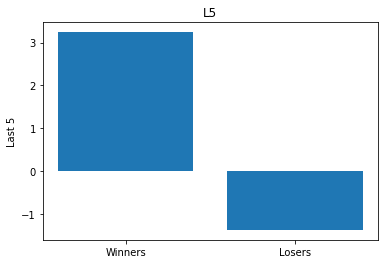

In [ ]:
#Average of winners' Last 5 rating compared to losers'
HomeWinLast = HomeWin['Home_Team_Last5'].mean()
AwayWinLast = AwayWin['Away_Team_Last5'].mean()
HomeLoseLast = AwayWin['Home_Team_Last5'].mean()
AwayLoseLast = HomeWin['Away_Team_Last5'].mean()

data = [(HomeWinLast + AwayWinLast) / 2, (HomeLoseLast + AwayLoseLast) / 2]
labels = ['Winners', 'Losers']

plt.bar(labels, data)
plt.ylabel('Last 5')
plt.title('L5')

Text(0.5, 1.0, 'OF')

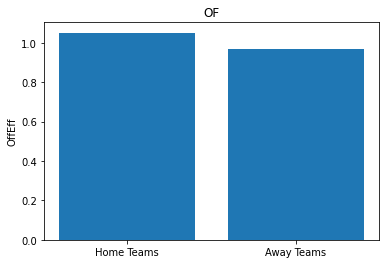

In [ ]:
#Testing home teams who win offeff compared to away teams that win
HomeWinOff = HomeWin['Home_OffEff_Home'].mean()
AwayWinOff = AwayWin['Away_OffEff_Away'].mean()

data = [HomeWinOff, AwayWinOff]
labels = ['Home Teams', 'Away Teams']

plt.bar(labels, data)
plt.ylabel('OffEff')
plt.title('OF')

Text(0.5, 1.0, 'DF')

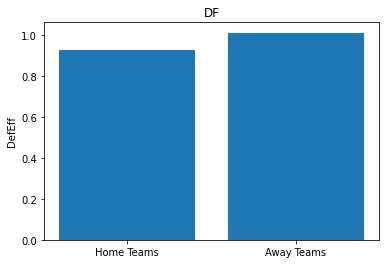

In [ ]:
#Testing home teams who win defeff compared to away teams that win
HomeWinDef = (HomeWin['Home_Def_Eff_Home']).mean()
AwayWinDef = (AwayWin['Away_Def_Eff_Away']).mean()

data = [HomeWinDef, AwayWinDef]
labels = ['Home Teams', 'Away Teams']

plt.bar(labels, data)
plt.ylabel('DefEff')
plt.title('DF')

Text(0.5, 1.0, 'Turn')

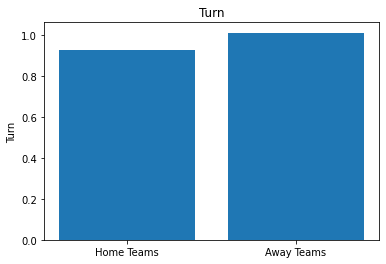

In [ ]:
#Testing home teams who win turn compared to away teams that win
HomeWinTurn = (HomeWin['Home_Turn_PerPoss_Home']).mean()
AwayWinTurn = (AwayWin['Away_Turn_PerPoss_Away']).mean()

data = [HomeWinDef, AwayWinDef]
labels = ['Home Teams', 'Away Teams']

plt.bar(labels, data)
plt.ylabel('Turn')
plt.title('Turn')

In [ ]:
#Average difference between Away teams def eff vs home teams def eff when away team won
Dif = []
for (i,x) in zip(AwayWin['Away_Def_Eff_Away'],AwayWin['Home_Def_Eff_Home']):
  dif = (i - x)
  Dif.append(dif)

Sum = 0
for j in Dif:
  Sum = Sum + j

print(Sum/ len(Dif))

0.05092776998597482


In [ ]:
#Average difference between Home teams def eff vs Away teams def eff when home team won
Dif = []
for (i,x) in zip(HomeWin['Home_Def_Eff_Home'],HomeWin['Away_Def_Eff_Away']):
  dif = (i - x)
  Dif.append(dif)

Sum = 0
for j in Dif:
  Sum = Sum + j

print(Sum/ len(Dif))

-0.10485980437820205


In [ ]:
#Average difference between Away teams turnovers per poss vs home teams turnovers per poss when home team won
Dif = []
for (i,x) in zip(HomeWin['Home_Turn_PerPoss_Home'],HomeWin['Away_Turn_PerPoss_Away']):
  dif = (i - x)
  Dif.append(dif)

Sum = 0
for j in Dif:
  Sum = Sum + j

print(Sum/ len(Dif))

-1.8213786679087076


In [ ]:
#Average difference between Away teams turnovers per poss vs home teams turnovers per poss when away team won
Dif = []
for (i,x) in zip(AwayWin['Away_Turn_PerPoss_Away'],AwayWin['Home_Turn_PerPoss_Home']):
  dif = (i - x)
  Dif.append(dif)

Sum = 0
for j in Dif:
  Sum = Sum + j

print(Sum/ len(Dif))

0.7136746143057504


In [ ]:
#Average difference between Away teams off eff vs home teams off eff when away team won
Dif = []
for (i,x) in zip(AwayWin['Away_OffEff_Away'],AwayWin['Home_OffEff_Home']):
  dif = (i - x)
  Dif.append(dif)

Sum = 0
for j in Dif:
  Sum = Sum + j

print(Sum/ len(Dif))

-0.03836746143057506


In [ ]:
#Average difference between Away teams consistency vs home teams consistency when away team won
Dif = []
for (i,x) in zip(AwayWin['Away_Team_Consis'],AwayWin['Home_Team_Consis']):
  dif = (i - x)
  Dif.append(dif)

Sum = 0
for j in Dif:
  Sum = Sum + j

print(Sum/ len(Dif))

-0.060869565217391335


In [ ]:
#Average difference between Away teams Last 5 Rating vs home teams Last 5 Rating when away team won
Dif = []
for (i,x) in zip(AwayWin['Away_Team_Last5'],AwayWin['Home_Team_Last5']):
  dif = (i - x)
  Dif.append(dif)

Sum = 0
for j in Dif:
  Sum = Sum + j

print(Sum/ len(Dif))

4.583099579242638


In [ ]:
#Average difference between Away teams fouls per poss vs home teams fouls per poss when away team won
Dif = []
for (i,x) in zip(AwayWin['Away_Fouls_PerPoss_Away'],AwayWin['Home_Fouls_PerPoss_Home']):
  dif = (i - x)
  Dif.append(dif)

Sum = 0
for j in Dif:
  Sum = Sum + j

print(Sum/ len(Dif))

1.6962131837307135


In [ ]:
#Average difference between Away teams first half rating vs home teams first half rating when away team won
Dif = []
for (i,x) in zip(AwayWin['Away_Team_First_Half_Rating'],AwayWin['Home_Team_First_Half_Rating']):
  dif = (i - x)
  Dif.append(dif)

Sum = 0
for j in Dif:
  Sum = Sum + j

print(Sum/ len(Dif))

2.525876577840113


In [ ]:
#Average difference between Away teams second half rating vs home teams second half rating when away team won
Dif = []
for (i,x) in zip(AwayWin['Away_Team_Second_Half_Rating'],AwayWin['Home_Team_Second_Half_Rating']):
  dif = (i - x)
  Dif.append(dif)

Sum = 0
for j in Dif:
  Sum = Sum + j

print(Sum/ len(Dif))

2.2050490883590443


In [ ]:
#Average difference between Home teams second half rating vs away teams second half rating when home team won
Dif = []
for (i,x) in zip(HomeWin['Home_Team_Second_Half_Rating'],HomeWin['Away_Team_Second_Half_Rating']):
  dif = (i - x)
  Dif.append(dif)

Sum = 0
for j in Dif:
  Sum = Sum + j

print(Sum/ len(Dif))

2.1733115975780217


In [ ]:
#Average difference between Home teams first half rating vs Away teams first half rating when home team won
Dif = []
for (i,x) in zip(HomeWin['Home_Team_First_Half_Rating'],HomeWin['Away_Team_First_Half_Rating']):
  dif = (i - x)
  Dif.append(dif)

Sum = 0
for j in Dif:
  Sum = Sum + j

print(Sum/ len(Dif))

2.3852352119236184


In [ ]:
#Percent of away wins where away team had better defensive efficiency
Dif = 0
no = 0
for (i,x) in zip(AwayWin['Away_Def_Eff_Away'],AwayWin['Home_Def_Eff_Home']):
  if i < x:
    Dif = Dif +1
  else:
    no = no +1
Total = Dif + no
print((Dif/Total)*100)

28.471248246844322


In [ ]:
#Percent of away wins where away team had better offensive efficiency
Dif = 0
no = 0
for (i,x) in zip(AwayWin['Away_OffEff_Away'],AwayWin['Home_OffEff_Home']):
  if i > x:
    Dif = Dif +1
  else:
    no = no +1
Total = Dif + no
print((Dif/Total)*100)

32.46844319775596


In [ ]:
#Percent of away wins where away team had better offensive rebounding
Dif = 0
no = 0
for (i,x) in zip(AwayWin['Away_Off_RB_Pct_Away'],AwayWin['Home_Off_RB_Pct_Home']):
  if i > x:
    Dif = Dif +1
  else:
    no = no +1
Total = Dif + no
print((Dif/Total)*100)

42.14586255259467


In [ ]:
#Percent of away wins where away team had better defensive rebounding
Dif = 0
no = 0
for (i,x) in zip(AwayWin['Away_Def_RB_Pct_Away'],AwayWin['Home_Def_RB_Pct_Home']):
  if i > x:
    Dif = Dif +1
  else:
    no = no +1
Total = Dif + no
print((Dif/Total)*100)

40.67321178120617


In [ ]:
#Percent of away wins where away team had better last 5
Dif = 0
no = 0
for (i,x) in zip(AwayWin['Away_Team_Last5'],AwayWin['Home_Team_Last5']):
  if i > x:
    Dif = Dif +1
  else:
    no = no +1
Total = Dif + no
print((Dif/Total)*100)

68.09256661991586


In [ ]:
#Percent of away wins where away team had better FT shooting
Dif = 0
no = 0
for (i,x) in zip(AwayWin['Away_FTpct_Away'],AwayWin['Home_FTpct_Home']):
  if i > x:
    Dif = Dif +1
  else:
    no = no +1
Total = Dif + no
print((Dif/Total)*100)

48.457223001402525


In [ ]:
#Percent of away wins where away team had worse fouls
Dif = 0
no = 0
for (i,x) in zip(AwayWin['Away_Fouls_PerPoss_Away'],AwayWin['Home_Fouls_PerPoss_Home']):
  if i > x:
    Dif = Dif +1
  else:
    no = no +1
Total = Dif + no
print((Dif/Total)*100)

65.70827489481066


In [ ]:
#Percent of away wins where away team had better first half rating
Dif = 0
no = 0
for (i,x) in zip(AwayWin['Away_Team_First_Half_Rating'],AwayWin['Home_Team_First_Half_Rating']):
  if i > x:
    Dif = Dif +1
  else:
    no = no +1
Total = Dif + no
print((Dif/Total)*100)

69.49509116409537


In [ ]:
#Percent of away wins where away team had better second half rating
Dif = 0
no = 0
for (i,x) in zip(AwayWin['Away_Team_Second_Half_Rating'],AwayWin['Home_Team_Second_Half_Rating']):
  if i > x:
    Dif = Dif +1
  else:
    no = no +1
Total = Dif + no
print((Dif/Total)*100)

69.7054698457223


In [ ]:
#Percent of away wins where away team had better defensive efficiency of last 3 games
Dif = 0
no = 0
for (i,x) in zip(AwayWin['Away_OffEff_Last3'],AwayWin['Home_OffEff_Last3']):
  if i < x:
    Dif = Dif +1
  else:
    no = no +1
Total = Dif + no
print((Dif/Total)*100)

36.81626928471248


In [ ]:
#Percent of away wins where away team had better Turn per poss last 3
Dif = 0
no = 0
for (i,x) in zip(AwayWin['Away_Turn_PerPoss_Last3'],AwayWin['Home_Turn_PerPoss_Last3']):
  if i > x:
    Dif = Dif +1
  else:
    no = no +1
Total = Dif + no
print((Dif/Total)*100)

44.60028050490884


In [ ]:
#Percent of away wins where away team had harder SOS
Dif = 0
no = 0
for (i,x) in zip(AwayWin['Away_Team_SOS'],AwayWin['Home_Team_SOS']):
  if i > x:
    Dif = Dif +1
  else:
    no = no +1
Total = Dif + no
print((Dif/Total)*100)

66.90042075736325


In [ ]:
#Percent of Home wins where home team had harder SOS
Dif = 0
no = 0
for (i,x) in zip(HomeWin['Home_Team_SOS'],HomeWin['Away_Team_SOS']):
  if i > x:
    Dif = Dif +1
  else:
    no = no +1
Total = Dif + no
print((Dif/Total)*100)

67.34979040521658


In [ ]:
#Percent of home wins where home team had better offensive efficiency
Dif = 0
no = 0
for (i,x) in zip(HomeWin['Home_OffEff_Home'],HomeWin['Away_OffEff_Away']):
  if i > x:
    Dif = Dif +1
  else:
    no = no +1
Total = Dif + no
print((Dif/Total)*100)

84.95575221238938


In [ ]:
#Percent of home wins where home team had better defensive efficiency
Dif = 0
no = 0
for (i,x) in zip(HomeWin['Home_Def_Eff_Home'],HomeWin['Away_Def_Eff_Away']):
  if i < x:
    Dif = Dif +1
  else:
    no = no +1
Total = Dif + no
print((Dif/Total)*100)

86.02701443875175


In [ ]:
#Percent of away wins where away team had better offensive efficiency of last 3 games
Dif = 0
no = 0
for (i,x) in zip(AwayWin['Away_OffEff_Away'],AwayWin['Home_OffEff_Home']):
  if i > x:
    Dif = Dif +1
  else:
    no = no +1
Total = Dif + no
print((Dif/Total)*100)

32.46844319775596


In [ ]:
#Percent of away wins where away team had better Three pt
Dif = 0
no = 0
for (i,x) in zip(AwayWin['Away_Three_Pt_Rate_Away'],AwayWin['Home_Three_Pt_Rate_Home']):
  if i > x:
    Dif = Dif +1
  else:
    no = no +1
Total = Dif + no
print((Dif/Total)*100)

48.5273492286115


In [ ]:
#Percent of away wins where away team had better Three pt
Dif = 0
no = 0
for (i,x) in zip(AwayWin['Away_Three_Pt_Rate_Last3'],AwayWin['Home_Three_Pt_Rate_Last3']):
  if i > x:
    Dif = Dif +1
  else:
    no = no +1
Total = Dif + no
print((Dif/Total)*100)

49.78962131837307


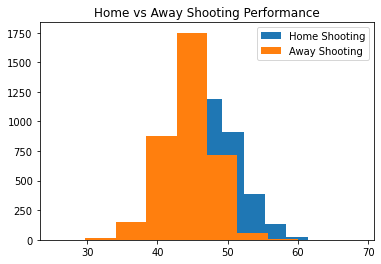

In [ ]:
#Home vs Away shooting

plt.hist(NCAA['Home_FloorPercent_Home'], 
         label='Home Shooting')
  
plt.hist(NCAA['Away_FloorPercent_Away'], 
         label='Away Shooting')
  
plt.legend(loc='upper right')
plt.title('Home vs Away Shooting Performance')
plt.show()

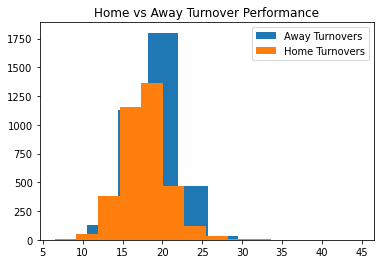

In [ ]:
plt.hist(NCAA['Away_Turn_PerPoss_Away'], 
         label='Away Turnovers')

plt.hist(NCAA['Home_Turn_PerPoss_Home'], 
         label='Home Turnovers')
  
plt.legend(loc='upper right')
plt.title('Home vs Away Turnover Performance')
plt.show()

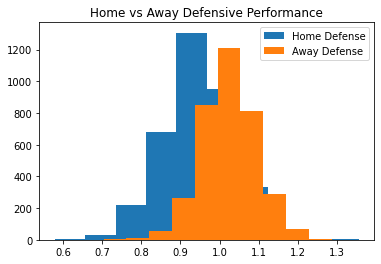

In [ ]:
plt.hist(NCAA['Home_Def_Eff_Home'], 
         label='Home Defense')

plt.hist(NCAA['Away_Def_Eff_Away'], 
         label='Away Defense')


plt.legend(loc='upper right')
plt.title('Home vs Away Defensive Performance')
plt.show()

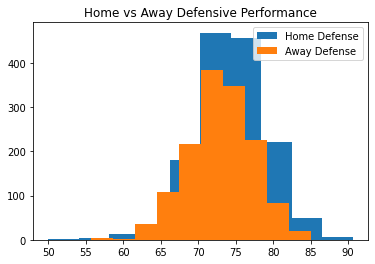

In [ ]:
plt.hist(AwayWin['Home_Def_RB_Pct_Home'], 
         label='Home Defense')

plt.hist(AwayWin['Away_Def_RB_Pct_Away'], 
         label='Away Defense')


plt.legend(loc='upper right')
plt.title('Home vs Away Defensive Performance')
plt.show()

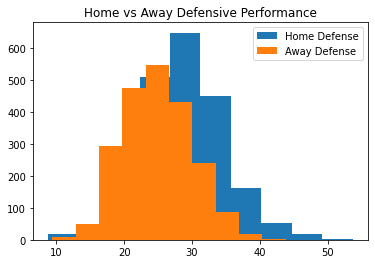

In [ ]:
plt.hist(HomeWin['Home_Off_RB_Pct_Home'], 
         label='Home Defense')

plt.hist(HomeWin['Away_Off_RB_Pct_Away'], 
         label='Away Defense')


plt.legend(loc='upper right')
plt.title('Home vs Away Defensive Performance')
plt.show()

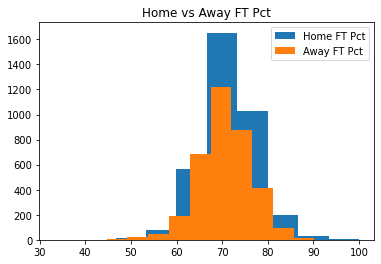

In [ ]:
plt.hist(NCAA['Home_FTpct_Home'], 
         label='Home FT Pct')

plt.hist(NCAA['Away_FTpct_Away'], 
         label='Away FT Pct')


plt.legend(loc='upper right')
plt.title('Home vs Away FT Pct')
plt.show()

In [ ]:
#Percent of away wins when having better turnover

AwayTurnBetter = NCAA[NCAA['Away_Turn_PerPoss_Away'] < NCAA['Home_Turn_PerPoss_Home']]
AwayTurnBetterWins = AwayTurnBetter[AwayTurnBetter['Home_Win/Lose_Pt'] < 0]
PercentAwayTurn = (AwayTurnBetterWins.shape[0] / AwayTurnBetter.shape[0]) * 100
PercentAwayTurn 

48.278688524590166

In [ ]:
#Percent of away wins when had better turnover and Def Eff
AwayTD = NCAA[(NCAA['Away_Turn_PerPoss_Away'] < NCAA['Home_Turn_PerPoss_Home']) & (NCAA['Away_Def_Eff_Away'] < NCAA['Home_Def_Eff_Home'])]
AwayTDWins = AwayTD[AwayTD['Home_Win/Lose_Pt'] < 0]
PercentAwayTD = (AwayTDWins.shape[0] / AwayTD.shape[0]) * 100
PercentAwayTD 

63.60294117647059

In [ ]:
#Percent of away wins when had better Last5 and Def Eff
AwayT5 = NCAA[(NCAA['Away_Team_Last5'] > NCAA['Home_Team_Last5']) & (NCAA['Away_Def_Eff_Away'] < NCAA['Home_Def_Eff_Home'])]
AwayT5Wins = AwayT5[AwayT5['Home_Win/Lose_Pt'] < 0]
PercentAwayT5 = (AwayT5Wins.shape[0] / AwayT5.shape[0]) * 100
PercentAwayT5

65.2751423149905

In [ ]:
#Percent of away wins when having better defense eff

AwayDB = NCAA[NCAA['Away_Def_Eff_Away'] < NCAA['Home_Def_Eff_Home']]
AwayDBWins = AwayDB[AwayDB['Home_Win/Lose_Pt'] < 0]
PercentAwayDB = (AwayDBWins.shape[0] / AwayDB.shape[0]) * 100
PercentAwayDB

57.7524893314367

In [ ]:
#Percent of away wins when had better Last5 and Def Eff
AwayT5 = NCAA[(NCAA['Away_Team_Last5'] > NCAA['Home_Team_Last5']) & (NCAA['Away_Def_Eff_Last3'] < NCAA['Home_Def_Eff_Last3'])]
AwayT5Wins = AwayT5[AwayT5['Home_Win/Lose_Pt'] < 0]
PercentAwayT5 = (AwayT5Wins.shape[0] / AwayT5.shape[0]) * 100
PercentAwayT5

61.179577464788736

In [ ]:
#Percent of away wins when had better Last5 and Def reb
AwayRD5 = NCAA[(NCAA['Away_Team_Last5'] > NCAA['Home_Team_Last5']) & (NCAA['Away_Def_RB_Pct_Away'] > NCAA['Home_Def_RB_Pct_Home'])]
AwayRD5Wins = AwayRD5[AwayRD5['Home_Win/Lose_Pt'] < 0]
PercentAwayRD5 = (AwayRD5Wins.shape[0] / AwayRD5.shape[0]) * 100
PercentAwayRD5

62.46458923512748

In [ ]:
#Percent of away wins when had better Last5 and Def reb
AwayRO5 = NCAA[(NCAA['Away_Team_Last5'] > NCAA['Home_Team_Last5']) & (NCAA['Away_Off_RB_Pct_Away'] > NCAA['Home_Off_RB_Pct_Home'])]
AwayRO5Wins = AwayRO5[AwayRO5['Home_Win/Lose_Pt'] < 0]
PercentAwayRO5 = (AwayRO5Wins.shape[0] / AwayRO5.shape[0]) * 100
PercentAwayRO5

62.5

In [ ]:
#Percent of away wins when had better Last5 and SOS
AwayRO5 = NCAA[(NCAA['Away_Team_Last5'] > NCAA['Home_Team_Last5']) & (NCAA['Away_Team_SOS'] > NCAA['Home_Team_SOS'])]
AwayRO5Wins = AwayRO5[AwayRO5['Home_Win/Lose_Pt'] < 0]
PercentAwayRO5 = (AwayRO5Wins.shape[0] / AwayRO5.shape[0]) * 100
PercentAwayRO5

65.7762938230384

In [ ]:
#Percent of away wins when had better Last5 and Def reb
AwayRO5 = NCAA[(NCAA['Away_Team_Last5'] > NCAA['Home_Team_Last5']) & (NCAA['Away_Off_RB_Pct_Away'] > NCAA['Home_Off_RB_Pct_Home']) & (NCAA['Away_Def_RB_Pct_Away'] > NCAA['Home_Def_RB_Pct_Home']) & (NCAA['Away_Team_SOS'] > NCAA['Home_Team_SOS']) & (NCAA['Away_Def_Eff_Away'] < NCAA['Home_Def_Eff_Home'])]
AwayRO5Wins = AwayRO5[AwayRD5['Home_Win/Lose_Pt'] < 0]
PercentAwayRO5 = (AwayRO5Wins.shape[0] / AwayRO5.shape[0]) * 100
PercentAwayRO5

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


77.27272727272727